In [40]:
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from keras.layers import *
from PIL import Image
import skimage
import os, os.path
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
import time
%matplotlib inline

In [41]:
earlystop = EarlyStopping(monitor='val_acc', mode='auto')
callbacks_list = [earlystop]

In [47]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        '/home/alexblck/Hackathon/Datasets/handwrittenmathsymbols/extracted_images',
        target_size=(45, 45),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical',
        subset='training')

val_generator = train_datagen.flow_from_directory(
        '/home/alexblck/Hackathon/Datasets/handwrittenmathsymbols/extracted_images',
        target_size=(45, 45),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical',
        subset='validation')

Found 300813 images belonging to 84 classes.
Found 75161 images belonging to 84 classes.


In [49]:
# CNN using Keras' Sequential

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(64, (5, 5), strides = (2,2), input_shape=(45, 45, 1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(64, (5, 5), strides = (1,1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(84))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=0.0005, decay=1e-6),
                metrics=['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 21, 21, 64)        1664      
_________________________________________________________________
activation_27 (Activation)   (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
activation_28 (Activation)   (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
__________

Epoch 1/20
4701/4701 [==============================] - 122s 26ms/step - loss: 0.8978 - acc: 0.7688 - val_loss: 0.3632 - val_acc: 0.9011
Epoch 2/20
4701/4701 [==============================] - 124s 26ms/step - loss: 0.4961 - acc: 0.8673 - val_loss: 0.3050 - val_acc: 0.9175
Epoch 3/20
4701/4701 [==============================] - 125s 27ms/step - loss: 0.4936 - acc: 0.8714 - val_loss: 0.3385 - val_acc: 0.9149


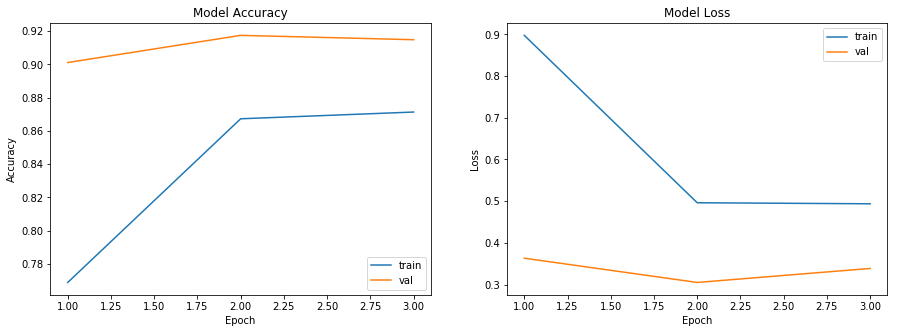

In [50]:
start = time.time()

model_info = model_1.fit_generator(
        train_generator,
        epochs=20,
        validation_data = val_generator,
        callbacks=callbacks_list)

end = time.time()
plot_model_history(model_info)

In [51]:
model_1.save('first_attempt.hdf5')